In [13]:
import numpy as np
import matplotlib.pyplot as plt

from numpy import ndarray
from sklearn.datasets import fetch_openml
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import QuantileTransformer, Normalizer, StandardScaler
from sklearn.svm import SVC, NuSVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score
from scipy.stats import uniform
from sklearn.utils.fixes import loguniform

from TrainUtils import fit_predict_wrapper, gridsearch_wrapper
from PlotUtils import plot_support_vectors
from DataTransformationsUtils import UnusedPixelsRemover
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Загрузка MNIST

In [2]:
X, y = fetch_openml('mnist_784', return_X_y=True, as_frame=False)

# PCA = 64, Scaler = Normalizer, Remove unused=True

In [36]:
param_grid = {  'C': uniform(1e-1, 1e1),
                'tol': uniform(1e-4, 1e-3),
                'class_weight':['balanced', None]}

estimator = RandomizedSearchCV(SVC(), param_distributions=param_grid, scoring="accuracy", cv=3, n_jobs=-1, random_state=0)
pipe = make_pipeline(UnusedPixelsRemover(), Normalizer(), PCA(n_components=64, random_state=0), estimator)
best_params = gridsearch_wrapper(pipe, X, y, train_size=5000, test_size=5000)

Shape after removing unused pixels: 663
Best params: {'C': 8.679456176227568, 'class_weight': None, 'tol': 0.0005236547993389048}
Best score: 0.9581992365032396


In [37]:
best_estimator = SVC(C=best_params['C'], tol=best_params['tol'], class_weight=best_params['class_weight'])
pipe = make_pipeline(UnusedPixelsRemover(), Normalizer(), PCA(n_components=64), best_estimator)
fit_predict_wrapper(pipe, X, y, train_size=65000, test_size=5000)

Shape after removing unused pixels: 717
Shape after removing unused pixels: 717
Accuracy score: 0.9868


# PCA = 64, Scaler = Normalizer, Remove unused=False

In [23]:
param_grid = {  'C': uniform(1e-1, 1e1),
                'tol': uniform(1e-4, 1e-3),
                'class_weight':['balanced', None]}

estimator = RandomizedSearchCV(SVC(), param_distributions=param_grid, scoring="accuracy", cv=3, n_jobs=-1, random_state=0)
pipe = make_pipeline(Normalizer(), PCA(n_components=64, random_state=0),  estimator)
best_params = gridsearch_wrapper(pipe, X, y, train_size=5000, test_size=5000)

Best params: {'C': 5.588135039273247, 'class_weight': None, 'tol': 0.0009442657485810174}
Best score: 0.9579992764952411


In [6]:
best_estimator = SVC(C=best_params['C'], tol=best_params['tol'], class_weight=best_params['class_weight'])
pipe = make_pipeline(Normalizer(), PCA(n_components=64, random_state=0, whiten=True), best_estimator)
fit_predict_wrapper(pipe, X, y, train_size=65000, test_size=5000)

Accuracy score: 0.9868


Support vectors count: 10517
Support vectors count for each class: [ 710  450 1194 1211 1114 1261  806  990 1443 1338]


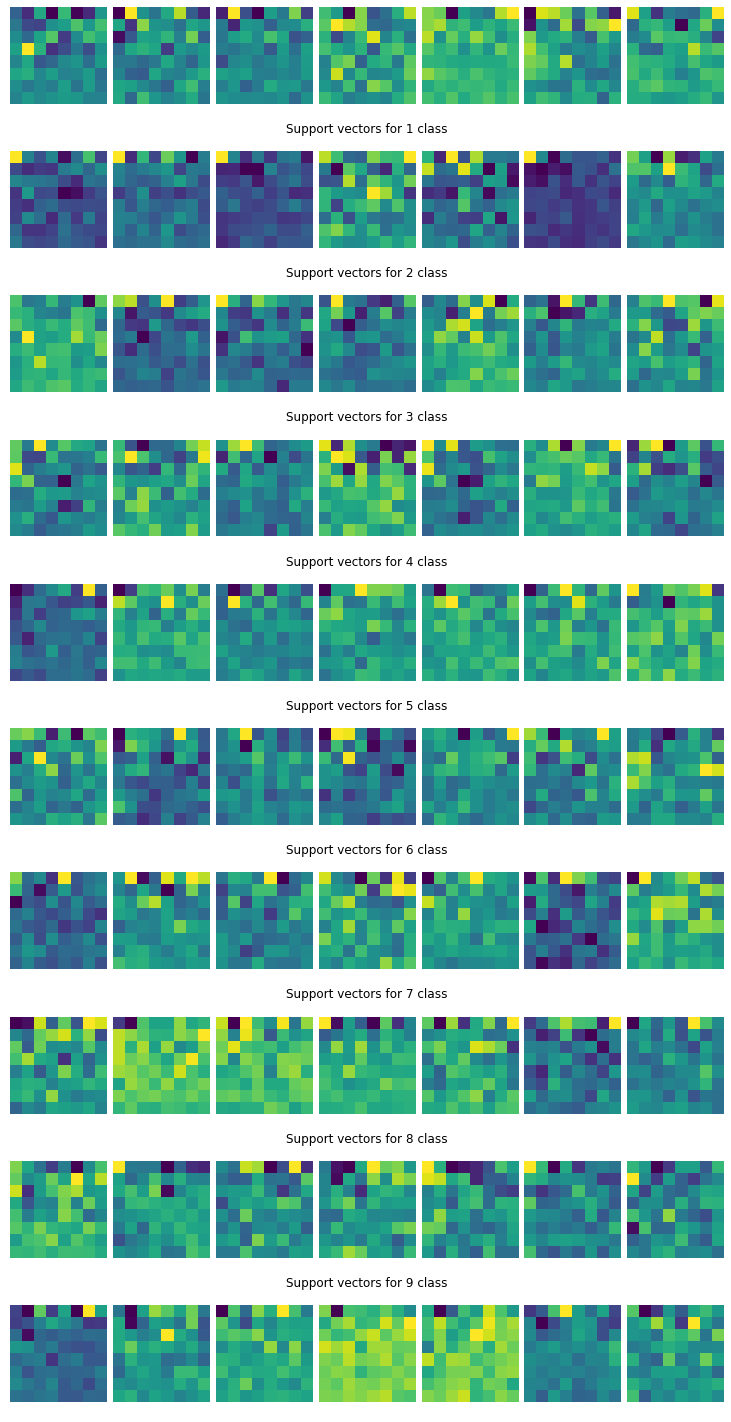

In [94]:
classes_names = [str(i) for i in range(10)]
plot_support_vectors(best_estimator, (8, 8), classes_names)

# Какая метрика (log)
# Впринципе пока, как MNIST
# С выходной величиной что-то сделать, может её отнормировать